In [1]:
import sys
sys.path.insert(0, './../Libs/')
import numpy as np
from BasisFunction import BaseBasicFunction
from SoftMarginSVM import DualitySoftMarginSVM
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.utils import shuffle

def _shuffle(X, t):
    X, t = shuffle(X, t.ravel())
    t = t.reshape(-1, 1)
    return (X, t)

def __t_convert(tsamples):
    for i in tsamples:
        yield (i - 0.5)*2

In [2]:
sampleNoise = 0.2
seed = 0
Nsamples = 20
NsamplesEachClass = int(Nsamples/2)

centers = [
    [0, 0],
    [0.5, 0.5]
]

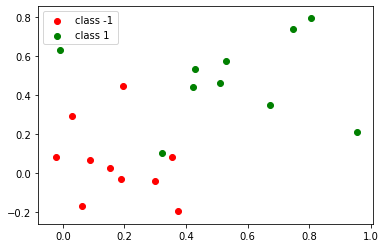

In [3]:
X, t = skdata.make_blobs(n_samples = [NsamplesEachClass, NsamplesEachClass], 
                         cluster_std = sampleNoise, random_state = seed, shuffle = False, centers = centers)

plt.scatter(X[:NsamplesEachClass, 0], X[:NsamplesEachClass, 1], c = 'r', label = "class -1")
plt.scatter(X[NsamplesEachClass:, 0], X[NsamplesEachClass:, 1], c = 'g', label = "class 1")
plt.legend()

done fitting, w = 
[[4.14148906]
 [6.36480976]]
b = -2.970545131935755



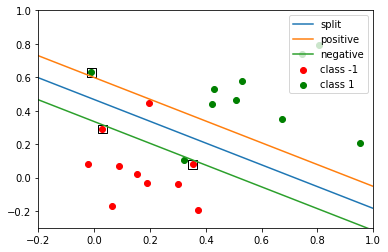

In [10]:
X, t = skdata.make_blobs(n_samples = [NsamplesEachClass, NsamplesEachClass], 
                         cluster_std = sampleNoise, random_state = seed, shuffle = False, centers = centers)

plt.scatter(X[:NsamplesEachClass, 0], X[:NsamplesEachClass, 1], c = 'r', label = "class -1")
plt.scatter(X[NsamplesEachClass:, 0], X[NsamplesEachClass:, 1], c = 'g', label = "class 1")

X, t = _shuffle(X, t)
t = np.array([i for i in __t_convert(t)]).reshape(-1, 1)
svm = DualitySoftMarginSVM(X, t, 1000).fit()

w = svm.w.ravel()
a, b = w
c = svm.b
slope = -a/b
offset = -c/b

width = 1/np.sqrt(a*a + b*b)

w_xy = np.array([slope, offset]).reshape(-1, 1)
Xdraw = np.linspace(-0.2, 1.6, 100).reshape(-1, 1)
Xdraw_ = np.hstack((Xdraw, np.ones(100).reshape(-1, 1)))
ydraw = Xdraw_.dot(w_xy)

y_pos_draw = ydraw + width * np.ones(100).reshape(-1, 1)
y_neg_draw = ydraw - width * np.ones(100).reshape(-1, 1)

plt.plot(Xdraw, ydraw, label = "split")
plt.plot(Xdraw, y_pos_draw, label = "positive")
plt.plot(Xdraw, y_neg_draw, label = "negative")

sv_points = svm.supportVectorPoints()
Xmark = sv_points[:, 0].ravel()
ymark = sv_points[:, 1].ravel()

plt.scatter(Xmark, ymark, marker = 's', s=80, facecolors='none', edgecolors='k')

plt.xlim(-0.2, 1.0)
plt.ylim(-0.3, 1.0)
plt.legend()

fitting for 1e-05
done fitting, w = 
[[3.66104642e-05]
 [4.28313751e-05]]
b = -1.0000056600681329

fitting for 0.0001
done fitting, w = 
[[0.00036617]
 [0.00042839]]
b = -1.000056610880283

fitting for 0.001
done fitting, w = 
[[0.00366172]
 [0.00428393]]
b = -1.0005661114558753

fitting for 0.01
done fitting, w = 
[[0.03661728]
 [0.04283934]]
b = -1.0056611228258738

fitting for 0.1
done fitting, w = 
[[0.36617285]
 [0.42839344]]
b = -1.0566112305604434

fitting for 1
done fitting, w = 
[[1.90959535]
 [2.20374517]]
b = -1.2961463421823725

fitting for 10
done fitting, w = 
[[1.72320015]
 [3.57559678]]
b = -1.2192000316178078

fitting for 100
done fitting, w = 
[[3.21424417]
 [4.93978131]]
b = -1.461228929881575

fitting for 1000
done fitting, w = 
[[4.14148906]
 [6.36480976]]
b = -1.5942841906432106

fitting for 10000
done fitting, w = 
[[4.14149129]
 [6.36481183]]
b = -1.5942845507977337



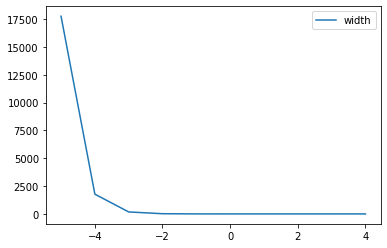

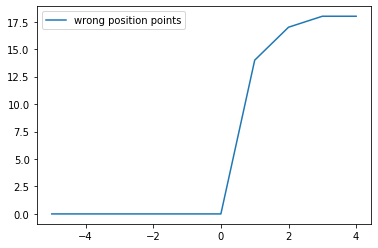

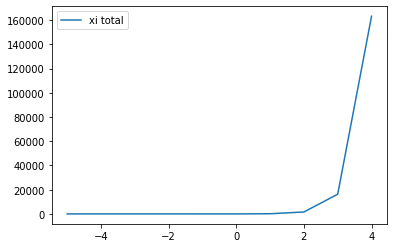

In [5]:
def plotIndividual(x, y, label):
    plt.figure()
    plt.plot(np.array(x), np.array(y), label = label)
    plt.legend()

rangeC = (-5, 5)
logCarr = [i for i in range(rangeC[0], rangeC[1])]
Carr = [10**i for i in range(rangeC[0], rangeC[1])]

widthArr = []
wrongPosArr = []
xiTotalArr = []

for C in Carr:
    print("fitting for {}".format(C))
    svm = DualitySoftMarginSVM(X, t, C).fit()
    widthArr.append(svm.width())
    wrongPosArr.append(svm.wrongPositionPoints())
    xiTotalArr.append(svm.xiTotal())

plotIndividual(logCarr, widthArr, "width")
plotIndividual(logCarr, wrongPosArr, "wrong position points")
plotIndividual(logCarr, xiTotalArr, "xi total")
